In [3]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# IMDB(Internet Movie Data Base)
-IMDB 구성 : Train Data(25000, 긍정> 12500, 부정> 12500)
            Test  Data(25000,  긍정> 12500, 부정> 12500)
NLP : Natural Language Process (자연어 처리)
말뭉치 : 하나의 데이터셋
토큰 : 하나의 단어를 의미
어휘사전 : 번호로 구분된 유일한 단어들의 집합

In [ ]:
Keras로 IMDB Data 불러오기
: IMDB는 어휘사전으로 숫자로 변횐되어 있음

In [5]:
from tensorflow.keras.datasets import imdb

In [6]:
(train_input, train_target), (test_input,test_target) = imdb.load_data(num_words=500) # 500개의 단어만 사용

In [ ]:
# train test 
print(len(train_input), len(test_input) )

25000 25000


In [12]:
train_input

array([list([1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 21, 

In [13]:
# train의 첫번째 문장의 Token 갯수
len(train_input[0])

218

In [14]:
# train의 두번째 문장의 Token 갯수
len(train_input[1])

189

In [ ]:
# 영화에 대한 댓글의 길이가 다르다

In [ ]:
# 첫번째 댓글의 출력
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [15]:
# - 자연어 처리는 구성하는게 중요하다
# - 모든 샘플의 시작 부분의 토큰은 1을 사용
# - 2는 선정한 단어갯수에 포함되지 않은 단어.
# - train_input의 자체는 넘파이 배열이나 사용자마다 
# - 댓글에 사용한 토큰수가 다르기 때문에 numpy배열를 사용하지 못하고 python의 list를 사용한다. 
print(train_target[:10]) # 1 긍정 0 부정



[1 0 0 1 0 0 1 0 1 0]


In [24]:
# 훈련세트 준비
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42 )

In [4]:
print(train_input.shape, val_input.shape, train_target.shape, val_target.shape)

(20000,) (5000,) (20000,) (5000,)


In [ ]:
# List Comprehension연습

In [ ]:
numList = []
for i in range(10):
    if i%2 == 0:
        numList.append(i)

In [ ]:
numList

[0, 2, 4, 6, 8]

In [ ]:
numList = [ i for i in range(10) if i%2 ==0]
numList

[0, 2, 4, 6, 8]

In [17]:
import numpy as np

In [18]:
numList = np.array([ i for i in range(10) if i%2 ==0])
numList

array([0, 2, 4, 6, 8])

In [19]:
# 각 리뷰마다 문장길이를 시각화 
trainLength = []
for i in train_input:
    trainLength.append(len(i))

np.array(trainLength)

array([218, 189, 141, ..., 184, 150, 153])

In [20]:
# 
trainLength = np.array([len(i) for i in train_input ])
trainLength

array([218, 189, 141, ..., 184, 150, 153])

In [21]:
# 평균과 중앙값
print(np.mean(trainLength), np.median(trainLength))

238.71364 178.0


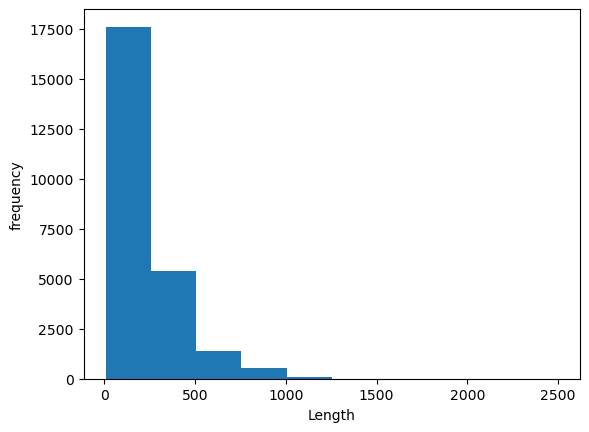

In [22]:
# > 중앙값보다 평균이 크므로 예상치 않게 길게 달린 댓글이 있다고 예측
import  matplotlib.pyplot as plt
plt.hist(trainLength)
plt.xlabel('Length')
plt.ylabel('frequency')
plt.show()

In [25]:
# Sequencd Padding
# :전체 자릿수를 100으로 가정 했을 경우 한문장에 토큰이 3개만 있을 경우, 97개는 0으로 채운다
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen = 100)
val_seq = pad_sequences(val_input, maxlen=100)

In [26]:
# 크기 확인
print(train_seq.shape)
print(val_seq.shape)

(20000, 100)
(5000, 100)


In [27]:
# 첫번째 댓글 확인
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [29]:
# 원본의 첫번째 댓글의 마지막 10개만 출력
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [ ]:
# train_input과 train_seq를 비교하면  뒷부분 10개가 동일하고 train_seq에는
#  0 숫자가 보이지 않으므로 train_input은 100개 단어 이상의 댓글이며
# 100개 제한 때문에 문자으이 앞부분이 짤렷음

In [41]:
# 다섯번째 댓글 확인
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [25]:
# train의 두번째 문장의 Token 갯수
len(train_input[5])

96

In [ ]:
# pad_sequences는 원본이 작은 경우 앞부분을 0으로 채운다
# 문장의 시작을 알리는 1도 보이고 1의 앞에는 0으로 
# 채워진 것으로 보아 100개토큰이 않되는 댓글이다

In [26]:
### 순환 신경망 모델 만들기
train_seq.shape

(20000, 100)

In [48]:
train_seq[5]

array([  0,   0,   0,   0,   1,   2, 195,  19,  49,   2,   2, 190,   4,
         2, 352,   2, 183,  10,  10,  13,  82,  79,   4,   2,  36,  71,
       269,   8,   2,  25,  19,  49,   7,   4,   2,   2,   2,   2,   2,
        10,  10,  48,  25,  40,   2,  11,   2,   2,  40,   2,   2,   5,
         4,   2,   2,  95,  14, 238,  56, 129,   2,  10,  10,  21,   2,
        94, 364, 352,   2,   2,  11, 190,  24, 484,   2,   7,  94, 205,
       405,  10,  10,  87,   2,  34,  49,   2,   7,   2,   2,   2,   2,
         2, 290,   2,  46,  48,  64,  18,   4,   2])

In [30]:
# One hot Encoding
from tensorflow import keras
train_oh = keras.utils.to_categorical(train_seq)
val_oh = keras.utils.to_categorical(val_seq)
print(train_oh.shape)                                      
print(val_oh.shape)                                      

(20000, 100, 500)
(5000, 100, 500)


In [31]:
train_oh[1]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout, SimpleRNN
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf


model = Sequential()

model.add(SimpleRNN(8,input_shape=(100,500)))
model.add(Dense(1, activation='sigmoid'))  

model.summary()

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4) # 기본값 : 0.0001

model.compile(optimizer= rmsprop , loss='binary_crossentropy', metrics=['accuracy'])  

mc = ModelCheckpoint('../Data/best_simplernn.keras', monitor='val_loss', save_best_only=True)
es = EarlyStopping(patience=3, restore_best_weights=True)


history = model.fit(
    train_oh, train_target,
    epochs=100, batch_size = 64,
    validation_data=(val_oh, val_target),
    callbacks=[mc, es]
)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 8)              │         4,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,081 (15.94 KB)

 Trainable params: 4,081 (15.94 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.5100 - loss: 0.6998 - val_accuracy: 0.5284 - val_loss: 0.6937
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5608 - loss: 0.6822 - val_accuracy: 0.5976 - val_loss: 0.6690
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6261 - loss: 0.6559 - val_accuracy: 0.6380 - val_loss: 0.6473
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6650 - loss: 0.6323 - val_accuracy: 0.6682 - val_loss: 0.6249
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6913 - loss: 0.6119 - val_accuracy: 0.6898 - val_loss: 0.6079
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7057 - loss: 0.5959 - val_accuracy: 0.6938 - val_loss: 0.6019
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7214 - loss: 0.5808 - val_accuracy: 0.7222 - val_loss: 0.5780
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7327 - loss: 0.5665 -

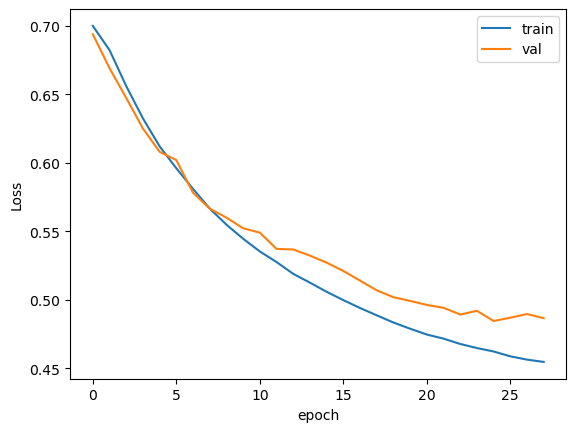

In [49]:
# > 전체 댓글의 토큰중 100개만 학습하였더니 거의 80%의 예측력
#시각화 해보기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['train','val'])
plt.show()


In [50]:
model.evaluate(train_oh, train_target)

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8038 - loss: 0.4568


[0.4568483829498291, 0.803849995136261]

In [52]:
model.evaluate(val_oh, val_target)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7826 - loss: 0.4844


[0.48440465331077576, 0.7825999855995178]